In [88]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import tensor
import torch.distributions as dist
import torch.optim as optim

sns.set_style("darkgrid")

import beanmachine.ppl as bm
from beanmachine.ppl.model import StatisticalModel
from beanmachine.ppl.model.utils import Mode

import beanmachine.ppl.experimental.neutra.iafmcmc_infer_model_test as iaf_test
import beanmachine.ppl.experimental.inference_compilation.ic_infer as ic_infer

Loss: tensor([91.0901], grad_fn=<AddBackward0>)


Loss: 2.01776385307312586


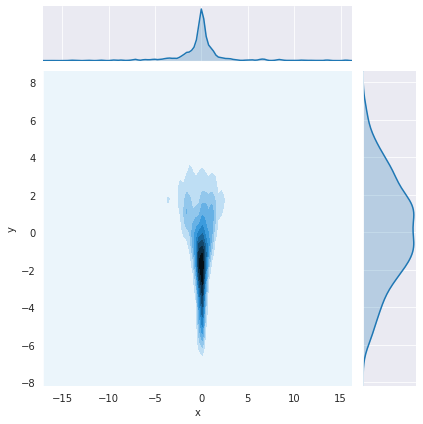

In [106]:
def test_neal_funnel():
    model = iaf_test.TestIAFInfer.NealFunnel()
    training_sample_size = 100
    num_adaptive_samples = 1000
    ic = ic_infer.ICInference().compile(
        observation_keys=[model.bar()],
        query_hints=[model.foo()],
        batch_size=training_sample_size,
        num_worlds=int(1e2),
        gmm_num_components=10,
        optimizer_func=lambda x: optim.Adam(x, lr=1e-2, weight_decay=1e-3)
    )
    samples_iaf = ic.infer(
        queries=[model.foo()],
        observations={model.bar(): tensor(0.0)},
        num_samples=1000,
        num_chains=1,
        num_adaptive_samples=int(1e4),
    )
    f_z = samples_iaf[model.foo()]
    return f_z
    #self.assertAlmostEqual(f_z[0][:, 1].mean(), 0.828, delta=0.8)
    #self.assertAlmostEqual(f_z[0][:, 0].mean(), 0.0390, delta=0.8)

f_z_neal_funnel = test_neal_funnel()

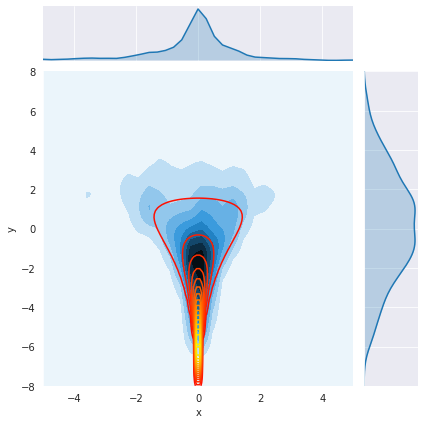

In [211]:
df = pd.DataFrame(f_z_neal_funnel.squeeze().numpy(), columns=["x", "y"])
grid = sns.jointplot(data=df, x="x", y="y", kind="kde", xlim=(-5,5), ylim=(-8, 8))

def nealfun(x,y):
    return dist.Normal(0, 3).log_prob(y).exp() + dist.Normal(0, (y/2).exp()).log_prob(x).exp()

X, Y = torch.meshgrid(
    torch.linspace(-5,5),
    torch.linspace(-8,8),
)
Z = nealfun(X,Y)
cmap = plt.cm.get_cmap("autumn")
grid.ax_joint.contour(X, Y, Z, 18, cmap=cmap)

Loss: tensor([92.6745], grad_fn=<AddBackward0>)


Loss: -3.315648078918457367


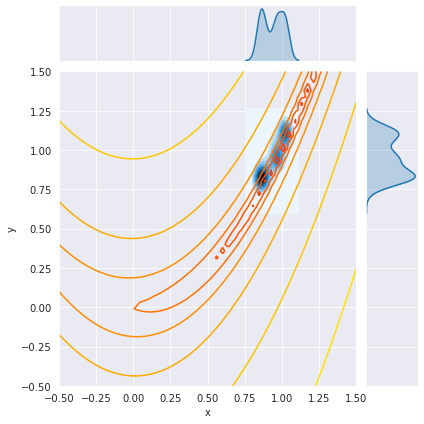

In [243]:
def test_rosen_brock():
    model = iaf_test.TestIAFInfer.RosenBrock()
    training_sample_size = 100
    ic = ic_infer.ICInference().compile(
        observation_keys=[model.bar()],
        query_hints=[model.foo()],
        batch_size=training_sample_size,
        num_worlds=int(1e2),
        gmm_num_components=10,
        optimizer_func=lambda x: optim.Adam(x, lr=1e-2, weight_decay=1e-3),
    )
    samples_iaf = ic.infer(
        queries=[model.foo()],
        observations={model.bar(): tensor(0.0)},
        num_samples=100,
        num_chains=1,
        num_adaptive_samples=int(1e3),
    )
    f_z = samples_iaf[model.foo()]
    return f_z
    
f_z_rosenbrock = test_rosen_brock()
df = pd.DataFrame(f_z_rosenbrock.squeeze().numpy(), columns=["x", "y"])
grid = sns.jointplot(data=df, x="x", y="y", kind="kde", xlim=(-.5,1.5), ylim=(-.5,1.5))

X, Y = np.meshgrid(
    np.linspace(-0.5, 1.5),
    np.linspace(-0.5, 1.5),
)

def rosenbrock(x,y):
    mu = 1
    a = 1
    b = 100
    c = 1
    return a * (mu - x)**2 + b * ((y - c*x**2))**2
Z = np.log(rosenbrock(X, Y))
cmap = plt.cm.get_cmap("autumn")
grid.ax_joint.contour(X, Y, Z, 10, cmap=cmap)

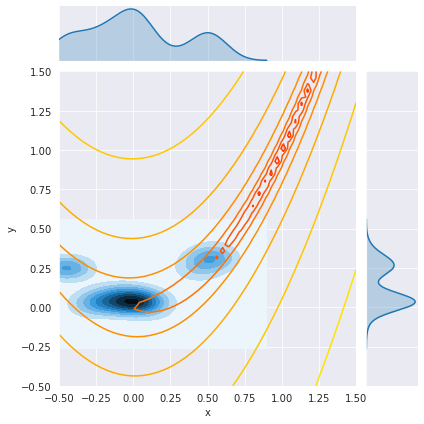

In [244]:
def test_rosen_brock():
    model = iaf_test.TestIAFInfer.RosenBrock()
    training_sample_size = 100
    samples_iaf = bm.SingleSiteRandomWalk().infer(
        queries=[model.foo()],
        observations={model.bar(): tensor(0.0)},
        num_samples=100,
        num_chains=1,
        num_adaptive_samples=int(1e3),
    )
    f_z = samples_iaf[model.foo()]
    return f_z
    
f_z_rosenbrock = test_rosen_brock()
df = pd.DataFrame(f_z_rosenbrock.squeeze().numpy(), columns=["x", "y"])
grid = sns.jointplot(data=df, x="x", y="y", kind="kde", xlim=(-.5,1.5), ylim=(-.5,1.5))

X, Y = np.meshgrid(
    np.linspace(-0.5, 1.5),
    np.linspace(-0.5, 1.5),
)

def rosenbrock(x,y):
    mu = 1
    a = 1
    b = 100
    c = 1
    return a * (mu - x)**2 + b * ((y - c*x**2))**2
Z = np.log(rosenbrock(X, Y))
cmap = plt.cm.get_cmap("autumn")
grid.ax_joint.contour(X, Y, Z, 10, cmap=cmap)